In [1]:
from skimage import io
from skimage import transform
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline 

(-0.5, 1023.5, 1023.5, -0.5)

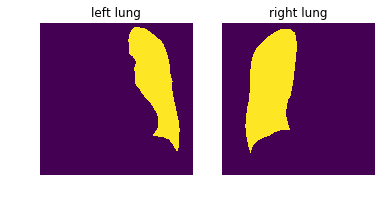

In [4]:
image_id = "JPCLN001.gif"
left_lung_dir = "/home/ycli/data/jsrt/segmentation_mask/scratch/fold1/masks/left_lung"
right_lung_dir = "/home/ycli/data/jsrt/segmentation_mask/scratch/fold1/masks/right_lung"

# background pixel mark as 0, lung pixel mask a 255
left_mask = io.imread(join(left_lung_dir, image_id))
right_mask = io.imread(join(right_lung_dir, image_id))

plt.subplot(121)
plt.imshow(left_mask)
plt.title("left lung")
plt.axis('off')

plt.subplot(122)
plt.imshow(right_mask)
plt.title("right lung")
plt.axis('off')

In [5]:
left_mask.shape

(1024, 1024)

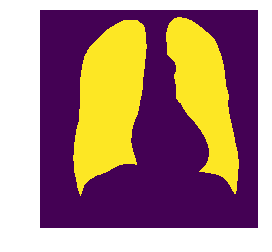

In [6]:
lung_mask = left_mask + right_mask

plt.axis("off")
plt.imshow(lung_mask)

In [7]:
# the original data a big-endian unsigned 16 int
raw = np.fromfile(join("/home/ycli/data/jsrt/All247images", "JPCLN001.IMG"),  dtype=">i2").astype("<i2").reshape((2048, 2048))
raw.shape

(2048, 2048)

In [8]:
# flip white color
raw = raw.max() - raw
lung =  cv2.resize(raw, (1024,1024))

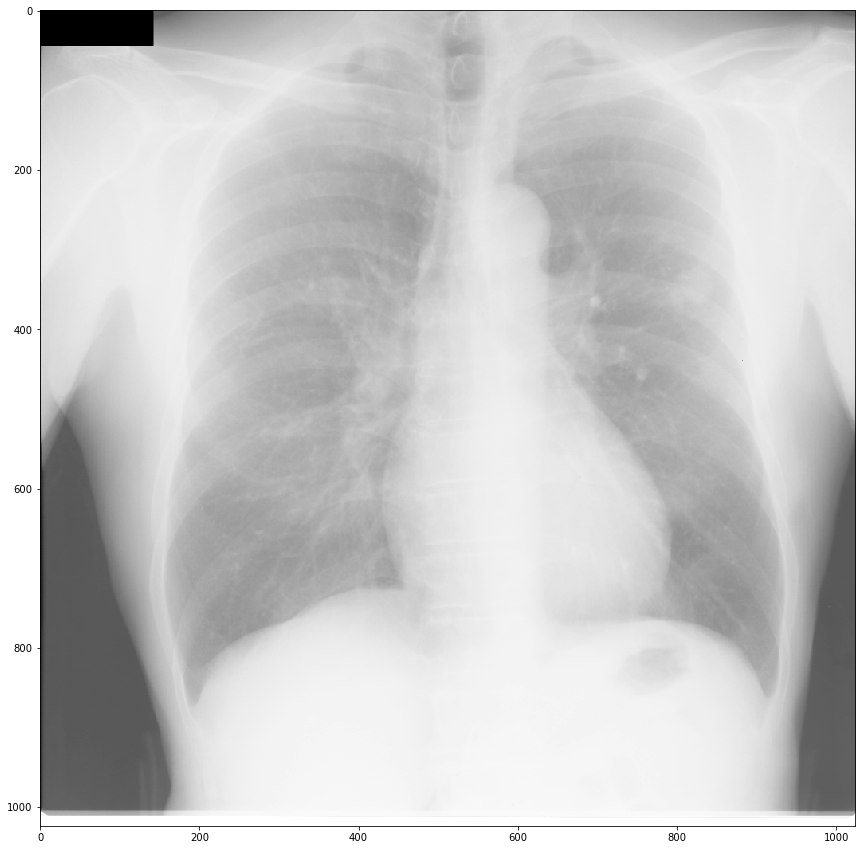

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(lung, cmap='gray', alpha=1)

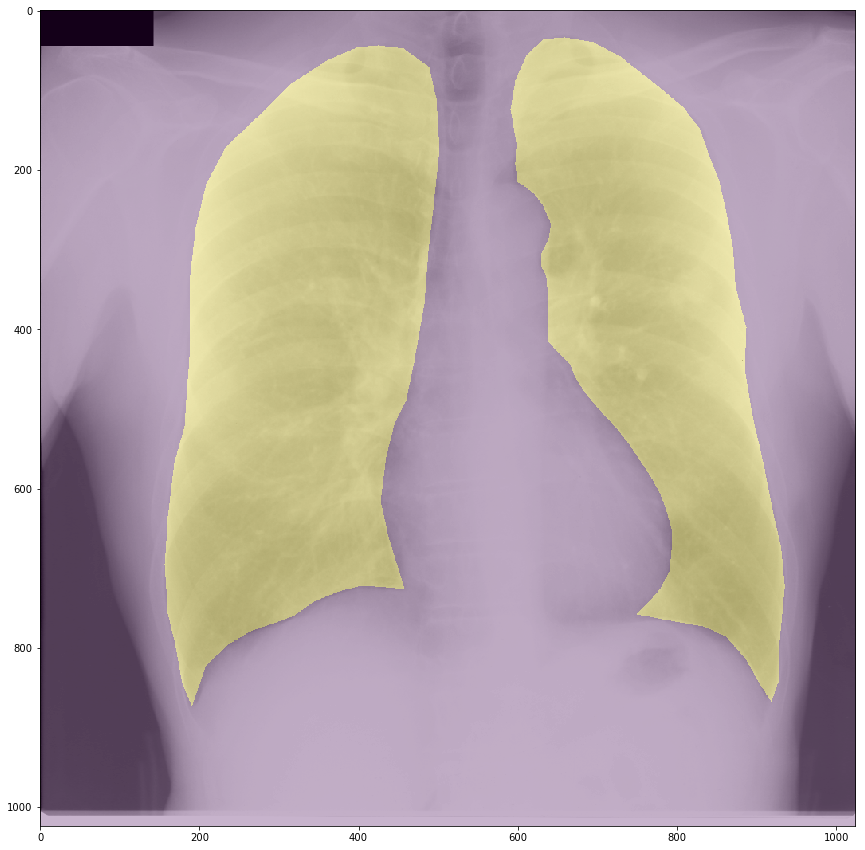

In [96]:
ax.imshow(lung_mask,  alpha=0.3)
fig

In [10]:
lung

array([[   0,    0,    0, ..., 1511, 1510, 1504],
       [   0,    0,    0, ..., 1516, 1515, 1515],
       [   0,    0,    0, ..., 1544, 1545, 1547],
       ..., 
       [2595, 4086, 4094, ..., 4091, 4090, 4091],
       [2517, 4079, 4094, ..., 4095, 4094, 4094],
       [2581, 4092, 4095, ..., 4095, 4095, 4095]], dtype=int16)